In [28]:
import numpy as np
import matplotlib.pyplot as plt
%run IDM_helper_functions.ipynb

import torch
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer

from sbi.inference import MNLE
from pyro.distributions import InverseGamma
from torch.distributions import Beta, Binomial, Gamma
from sbi.utils import MultipleIndependent

from sbi.inference import MCMCPosterior, VIPosterior, RejectionPosterior
from sbi.utils.torchutils import atleast_2d

from sbi.utils import mcmc_transform
from sbi.inference.potentials.base_potential import BasePotential

In [13]:
W_pos, W_neg = 52500, 8400
B1, B2 = 0, 0
N, theta = 2000, 51450

y1, y2 = 0.2, 0.2
beta=1/24
print(energy(y1,y2))
print(dEdy1(y1, y2, W_pos, W_neg, B1, theta))
print(dEdy2(y1,y2, W_pos, W_neg, B2, theta))
print(free_energy(y1,y2,N=2000))
print(dFdy1(y1,y2, W_pos, W_neg, B1, theta, beta, N))
print(dFdy2(y1,y2, W_pos, W_neg, B2, theta, beta, N))

16716.0
32130.0
32130.0
-7303.316329833018
-1141.064666877377
-1141.064666877377


In [44]:
# Training data
num_simulations = 50000
#prior = utils.BoxUniform(low=[0,0.2,0.1,0.005], high=[0.8,0.6,0.6,0.05])

#prior = utils.BoxUniform(low=[0,0.2,0.1], high=[0.8,0.6,0.6])
#prior = utils.BoxUniform(low=[0,0.2,0.1], high=[0.8,0.6,0.6])
prior = utils.BoxUniform(low=[0.01,0.2,0.2], high=[0.8,0.6,0.8])

parameters = prior.sample((num_simulations,))
x = simul_IDM_CG(np.array(parameters))

sim0
sim1000
sim2000
sim3000
sim4000
sim5000
sim6000
sim7000
sim8000
sim9000
sim10000
sim11000
sim12000
sim13000
sim14000
sim15000
sim16000
sim17000
sim18000
sim19000
sim20000
sim21000
sim22000
sim23000
sim24000
sim25000
sim26000
sim27000
sim28000
sim29000
sim30000
sim31000
sim32000
sim33000
sim34000
sim35000
sim36000
sim37000
sim38000
sim39000
sim40000
sim41000
sim42000
sim43000
sim44000
sim45000
sim46000
sim47000
sim48000
sim49000


In [45]:
# Train MNLE and obtain MCMC-based posterior.

trainer = MNLE(prior=prior)
trainer = trainer.append_simulations(parameters, x)
mnle = trainer.train()

 Neural network successfully converged after 47 epochs.

In [46]:
mcmc_parameters = dict(num_chains=50,thin=10,warmup_steps=50,init_strategy="proposal")
#mcmc_parameters=dict(init_strategy="resample", num_chains=10, warmup_steps=100)
#mnle_posterior = trainer.build_posterior(mnle, prior)

In [13]:
# inference with different x_o that has 10 trials
#torch.manual_seed(41)
num_trials = 10
num_samples = 100
parameters_o = prior.sample((1,))
#x_o = simul_IDM_mult_trial(np.array(parameters_o))
x_o = simul_IDM_CG(np.array(parameters_o.repeat(num_trials, 1)))

In [14]:
mnle_posterior = trainer.build_posterior(mnle, prior)

mnle_samples = mnle_posterior.sample((num_samples,), x=x_o)

/Users/wangjiashun/Documents/GitHub/sbi/sbi/utils/sbiutils.py:321: UserWarning: An x with a batch size of 10 was passed. It will be interpreted as a batch of independent and identically
            distributed data X={x_1, ..., x_n}, i.e., data generated based on the
            same underlying (unknown) parameter. The resulting posterior will be with
            respect to entire batch, i.e,. p(theta | X).
  respect to entire batch, i.e,. p(theta | X)."""


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

In [19]:
mnle_posterior.set_default_x(x_o)
mnle_map = mnle_posterior.map()

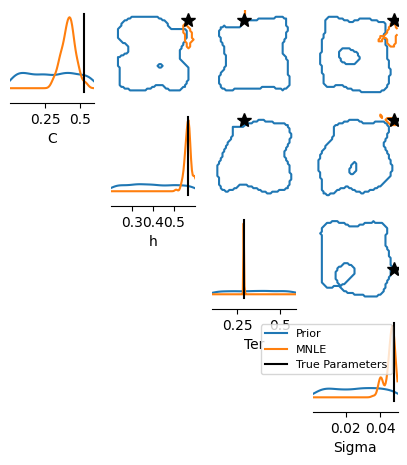

In [139]:
#pair_plot(prior, mnle_samples, parameters_o, 
contour = 0.7

fig, ax = pairplot(
    [
        prior.sample((1000,)),
        mnle_samples,
    ],
    points=parameters_o,
    diag="kde",
    upper="contour",
    kde_offdiag=dict(bins=50),
    kde_diag=dict(bins=100),
    contour_offdiag=dict(levels=[contour]),
    points_colors=["k"],
    points_offdiag=dict(marker="*", markersize=10),
    labels=['C', 'h','Ter', 'Sigma'],
    figsize=(5, 5)
)

#plt.sca(ax[1, 1])
plt.legend(
    ["Prior", "MNLE", 'True Parameters'],
    #frameon=False,
    fontsize=8,
    loc = 1
);

In [136]:
# inference with different x_o that has 10 trials
torch.manual_seed(42)
num_trials = 200
num_samples = 100
parameters_o = prior.sample((1,))
#x_o = simul_IDM_mult_trial(np.array(parameters_o))
x_o = simul_IDM_more_param(np.array(parameters_o.repeat(num_trials, 1)))

mnle_posterior = trainer.build_posterior(mnle, prior)

mnle_samples = mnle_posterior.sample((num_samples,), x=x_o)

/Users/wangjiashun/Documents/GitHub/sbi/sbi/utils/sbiutils.py:321: UserWarning: An x with a batch size of 200 was passed. It will be interpreted as a batch of independent and identically
            distributed data X={x_1, ..., x_n}, i.e., data generated based on the
            same underlying (unknown) parameter. The resulting posterior will be with
            respect to entire batch, i.e,. p(theta | X).
  respect to entire batch, i.e,. p(theta | X)."""


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

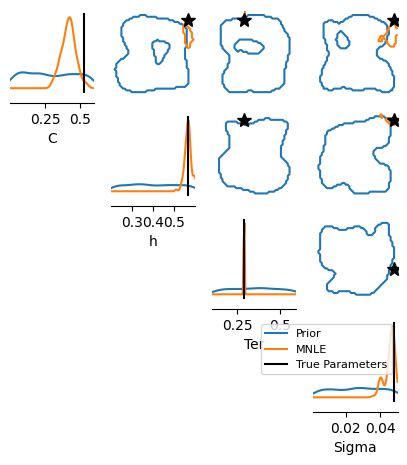

In [137]:
#pair_plot(prior, mnle_samples, parameters_o, 
contour = 0.7

fig, ax = pairplot(
    [
        prior.sample((1000,)),
        mnle_samples,
    ],
    points=parameters_o,
    diag="kde",
    upper="contour",
    kde_offdiag=dict(bins=50),
    kde_diag=dict(bins=100),
    contour_offdiag=dict(levels=[contour]),
    points_colors=["k"],
    points_offdiag=dict(marker="*", markersize=10),
    labels=['C', 'h','Ter', 'Sigma'],
    figsize=(5, 5)
)

#plt.sca(ax[1, 1])
plt.legend(
    ["Prior", "MNLE", 'True Parameters'],
    #frameon=False,
    fontsize=8,
    loc = 1
);

In [ ]:
# MAP!!!!
torch.manual_seed(42)
num_trials = 300
num_samples = 100
parameters_o = prior.sample((1,))
#x_o = simul_IDM_mult_trial(np.array(parameters_o))
x_o = simul_IDM_mult_trial(np.array(parameters_o.repeat(num_trials, 1)))
#mnle_samples = mnle_posterior.sample((num_samples,), x=x_o)
mnle_posterior.set_default_x(x_o)
mnle_map = mnle_posterior.map()

In [177]:
parameters_o

tensor([[0.3529, 0.5660, 0.2914]])

## Simulate from DDM and fit from IDM from my code

In [49]:
Vs = np.random.uniform(low=0, high=4, size=30)
As = np.random.uniform(low=0.4, high=1, size=30)
Ters = np.random.uniform(low=0.2, high=0.8, size=30)


n_trials = 250
num_samples = 100
par_fitted = np.zeros((30,3))

In [50]:
for i in range(len(Vs)):
    print(i)
    v,a,ter = Vs[i], As[i], Ters[i]
    DDM_o = simul_DDM(np.tile((Vs[i], As[i], Ters[i]), (n_trials,1)), c = 0.1) # simulate IDM data 0.1**0.5
    
    #prior = utils.BoxUniform(low=[0,0.2,0.1], high=[0.5,0.6,0.6])
    mnle_posterior = trainer.build_posterior(
    mcmc_method="slice_np_vectorized", mcmc_parameters=mcmc_parameters, prior = prior
    )
    
    #mnle_samples = mnle_posterior.sample((num_samples,), x=x_o) # fit with IDM
    mnle_posterior.set_default_x(DDM_o)
    mnle_map = mnle_posterior.map()
    
    par_fitted[i,:] = np.array(mnle_map)
    
    

0


/Users/wangjiashun/Documents/GitHub/sbi/sbi/utils/sbiutils.py:321: UserWarning: An x with a batch size of 250 was passed. It will be interpreted as a batch of independent and identically
            distributed data X={x_1, ..., x_n}, i.e., data generated based on the
            same underlying (unknown) parameter. The resulting posterior will be with
            respect to entire batch, i.e,. p(theta | X).
  respect to entire batch, i.e,. p(theta | X)."""


1
2
3
4
5
6
7
8
9
10
11
12
13
Optimization was interrupted after 804 iterations. 
14


KeyboardInterrupt: 

Text(0, 0.5, 'ter')

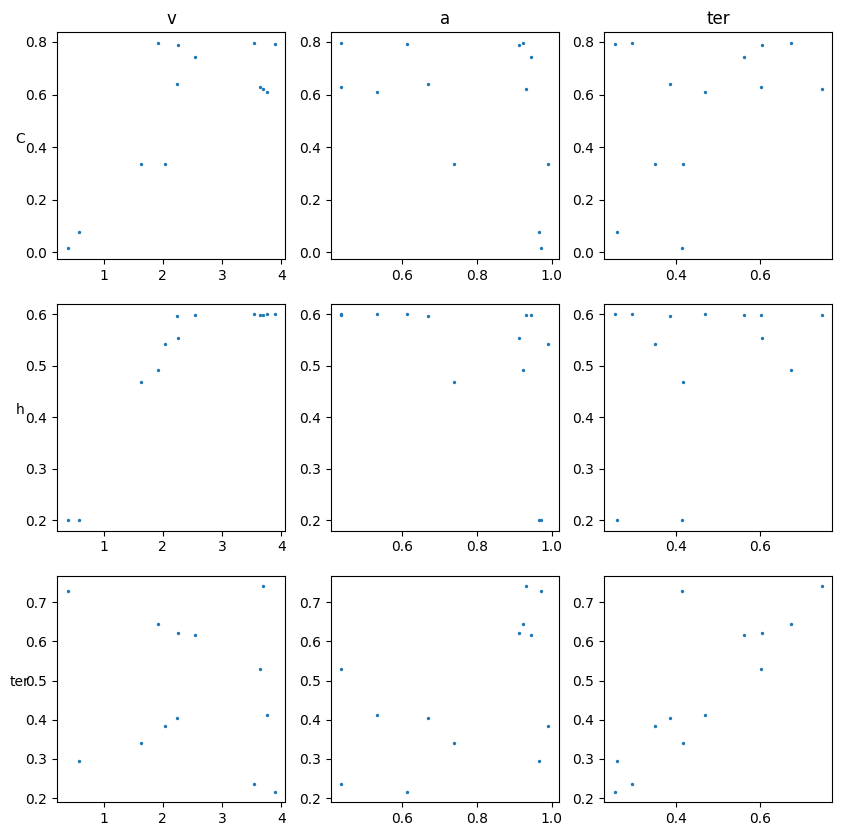

In [51]:
sim_num = 13
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(10,10))

ax1.scatter(Vs[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax2.scatter(As[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax3.scatter(Ters[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax4.scatter(Vs[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax5.scatter(As[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax6.scatter(Ters[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax7.scatter(Vs[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax8.scatter(As[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax9.scatter(Ters[0:sim_num], par_fitted[0:sim_num,2], s = 2)

ax1.set_title("v")
ax2.set_title("a")
ax3.set_title("ter")

ax1.set_ylabel("C", rotation=0)
ax4.set_ylabel("h", rotation=0)
ax7.set_ylabel("ter", rotation=0)

In [32]:
Vs = np.random.uniform(low=0, high=4, size=30)
As = np.random.uniform(low=0.4, high=1, size=30)
Ters = np.random.uniform(low=0.2, high=0.8, size=30)


n_trials = 500
num_samples = 100
par_fitted = np.zeros((30,3))

In [33]:
for i in range(len(Vs)):
    print(i)
    v,a,ter = Vs[i], As[i], Ters[i]
    DDM_o = simul_DDM(np.tile((Vs[i], As[i], Ters[i]), (n_trials,1)), c = 0.1**0.5) # simulate IDM data 0.1**0.5
    
    #prior = utils.BoxUniform(low=[0,0.2,0.1], high=[0.5,0.6,0.6])
    mnle_posterior = trainer.build_posterior(
    mcmc_method="slice_np_vectorized", mcmc_parameters=mcmc_parameters, prior = prior
    )
    
    #mnle_samples = mnle_posterior.sample((num_samples,), x=x_o) # fit with IDM
    mnle_posterior.set_default_x(DDM_o)
    mnle_map = mnle_posterior.map()
    
    par_fitted[i,:] = np.array(mnle_map)
    
    

0


/Users/wangjiashun/Documents/GitHub/sbi/sbi/utils/sbiutils.py:321: UserWarning: An x with a batch size of 500 was passed. It will be interpreted as a batch of independent and identically
            distributed data X={x_1, ..., x_n}, i.e., data generated based on the
            same underlying (unknown) parameter. The resulting posterior will be with
            respect to entire batch, i.e,. p(theta | X).
  respect to entire batch, i.e,. p(theta | X)."""


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


Text(0, 0.5, 'ter')

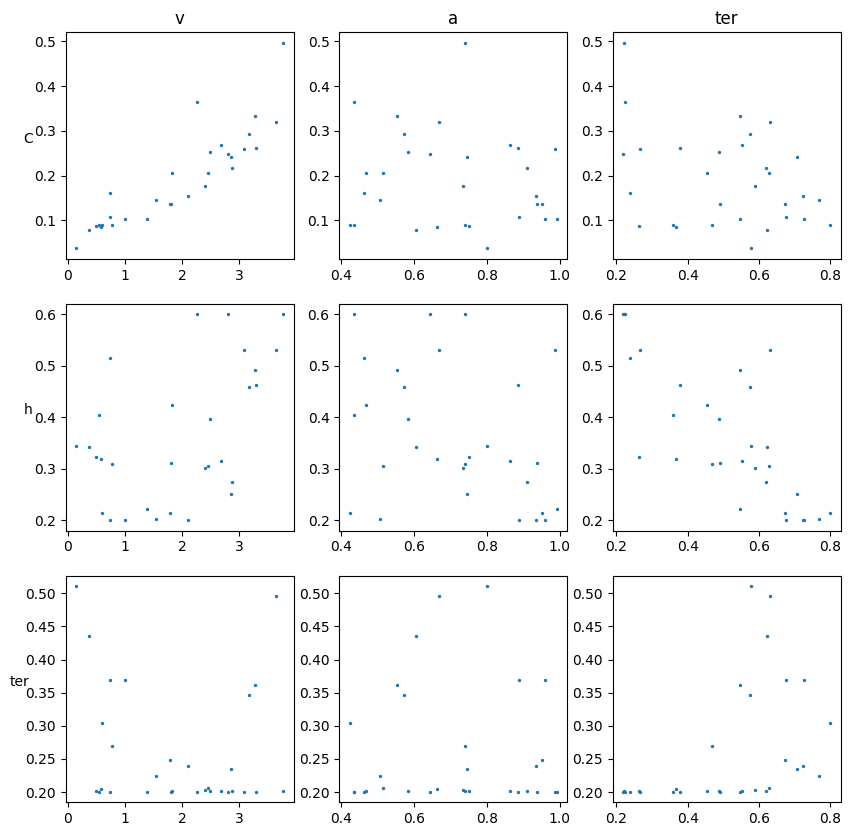

In [34]:
sim_num = 30
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(10,10))

ax1.scatter(Vs[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax2.scatter(As[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax3.scatter(Ters[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax4.scatter(Vs[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax5.scatter(As[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax6.scatter(Ters[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax7.scatter(Vs[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax8.scatter(As[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax9.scatter(Ters[0:sim_num], par_fitted[0:sim_num,2], s = 2)

ax1.set_title("v")
ax2.set_title("a")
ax3.set_title("ter")

ax1.set_ylabel("C", rotation=0)
ax4.set_ylabel("h", rotation=0)
ax7.set_ylabel("ter", rotation=0)

In [35]:
Vs = np.random.uniform(low=0, high=4, size=30)
As = np.random.uniform(low=0.6, high=2, size=30)
Ters = np.random.uniform(low=0.2, high=0.8, size=30)


n_trials = 300
num_samples = 100
par_fitted = np.zeros((30,3))

In [36]:
for i in range(len(Vs)):
    print(i)
    v,a,ter = Vs[i], As[i], Ters[i]
    DDM_o = simul_DDM(np.tile((Vs[i], As[i], Ters[i]), (n_trials,1)), c = 1) # simulate IDM data 0.1**0.5
    
    #prior = utils.BoxUniform(low=[0,0.2,0.1], high=[0.5,0.6,0.6])
    mnle_posterior = trainer.build_posterior(
    mcmc_method="slice_np_vectorized", mcmc_parameters=mcmc_parameters, prior = prior
    )
    
    #mnle_samples = mnle_posterior.sample((num_samples,), x=x_o) # fit with IDM
    mnle_posterior.set_default_x(DDM_o)
    mnle_map = mnle_posterior.map()
    
    par_fitted[i,:] = np.array(mnle_map)
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


Text(0, 0.5, 'ter')

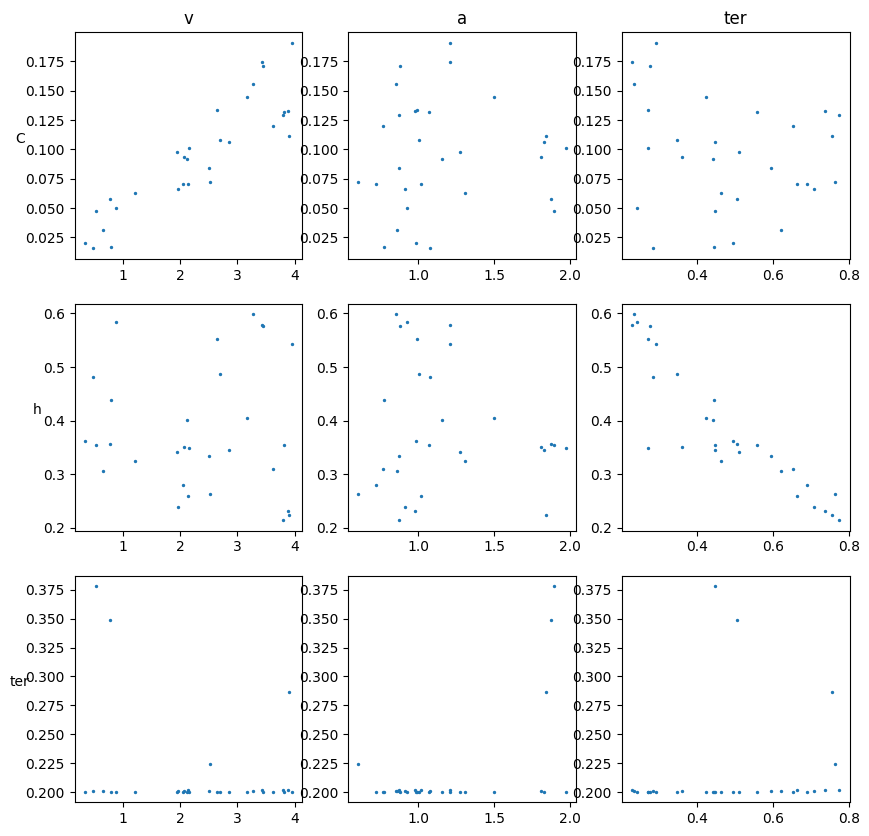

In [37]:
sim_num = 30
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(10,10))

ax1.scatter(Vs[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax2.scatter(As[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax3.scatter(Ters[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax4.scatter(Vs[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax5.scatter(As[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax6.scatter(Ters[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax7.scatter(Vs[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax8.scatter(As[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax9.scatter(Ters[0:sim_num], par_fitted[0:sim_num,2], s = 2)

ax1.set_title("v")
ax2.set_title("a")
ax3.set_title("ter")

ax1.set_ylabel("C", rotation=0)
ax4.set_ylabel("h", rotation=0)
ax7.set_ylabel("ter", rotation=0)

In [38]:
Vs = np.random.uniform(low=0, high=4, size=30)
As = np.random.uniform(low=0.4, high=1, size=30)
Ters = np.random.uniform(low=0.2, high=0.8, size=30)


n_trials = 300
num_samples = 100
par_fitted = np.zeros((30,3))

In [39]:
for i in range(len(Vs)):
    print(i)
    v,a,ter = Vs[i], As[i], Ters[i]
    DDM_o = simul_DDM(np.tile((Vs[i], As[i], Ters[i]), (n_trials,1)), c = 1) # simulate IDM data 0.1**0.5
    
    #prior = utils.BoxUniform(low=[0,0.2,0.1], high=[0.5,0.6,0.6])
    mnle_posterior = trainer.build_posterior(
    mcmc_method="slice_np_vectorized", mcmc_parameters=mcmc_parameters, prior = prior
    )
    
    #mnle_samples = mnle_posterior.sample((num_samples,), x=x_o) # fit with IDM
    mnle_posterior.set_default_x(DDM_o)
    mnle_map = mnle_posterior.map()
    
    par_fitted[i,:] = np.array(mnle_map)
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


Text(0, 0.5, 'ter')

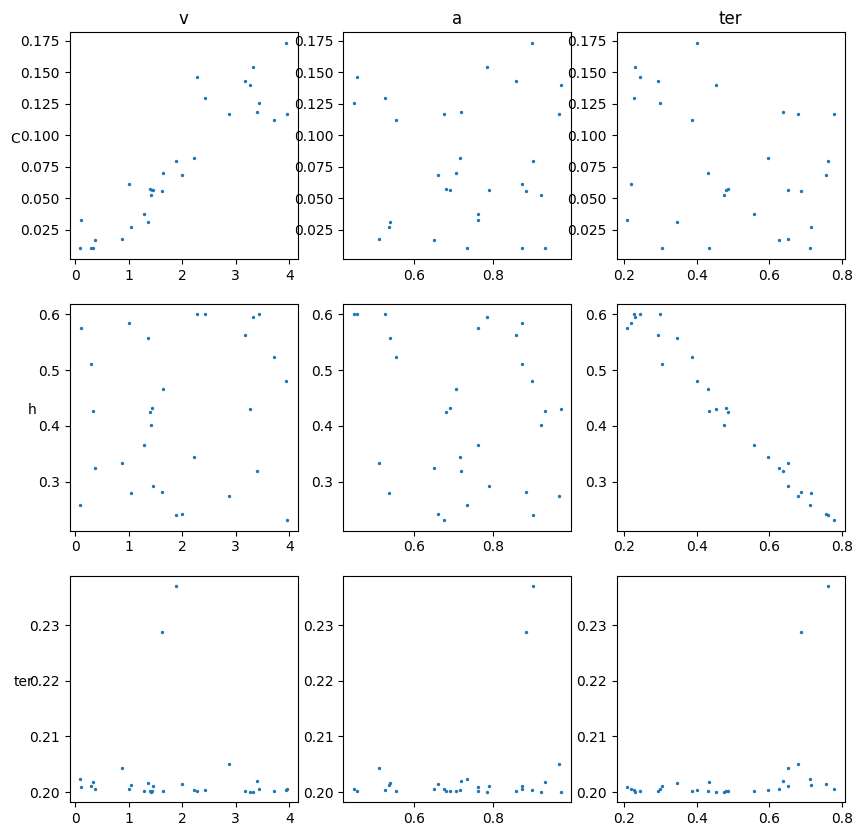

In [40]:
sim_num = 30
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(10,10))

ax1.scatter(Vs[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax2.scatter(As[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax3.scatter(Ters[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax4.scatter(Vs[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax5.scatter(As[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax6.scatter(Ters[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax7.scatter(Vs[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax8.scatter(As[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax9.scatter(Ters[0:sim_num], par_fitted[0:sim_num,2], s = 2)

ax1.set_title("v")
ax2.set_title("a")
ax3.set_title("ter")

ax1.set_ylabel("C", rotation=0)
ax4.set_ylabel("h", rotation=0)
ax7.set_ylabel("ter", rotation=0)

Text(0, 0.5, 'ter')

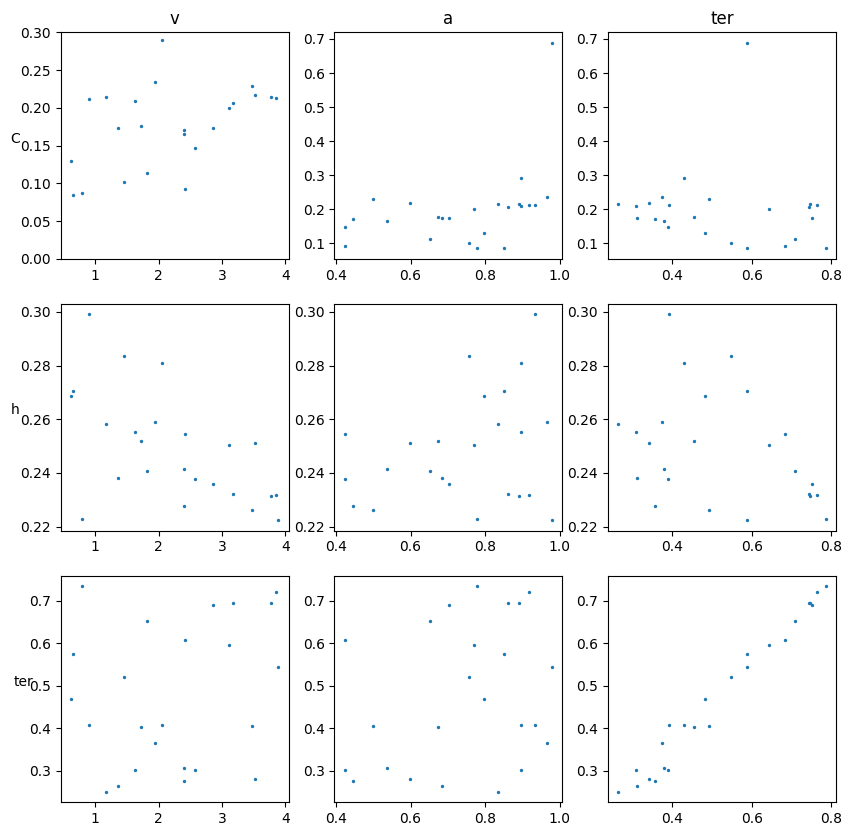

In [14]:
# C = 1

Text(0, 0.5, 'ter')

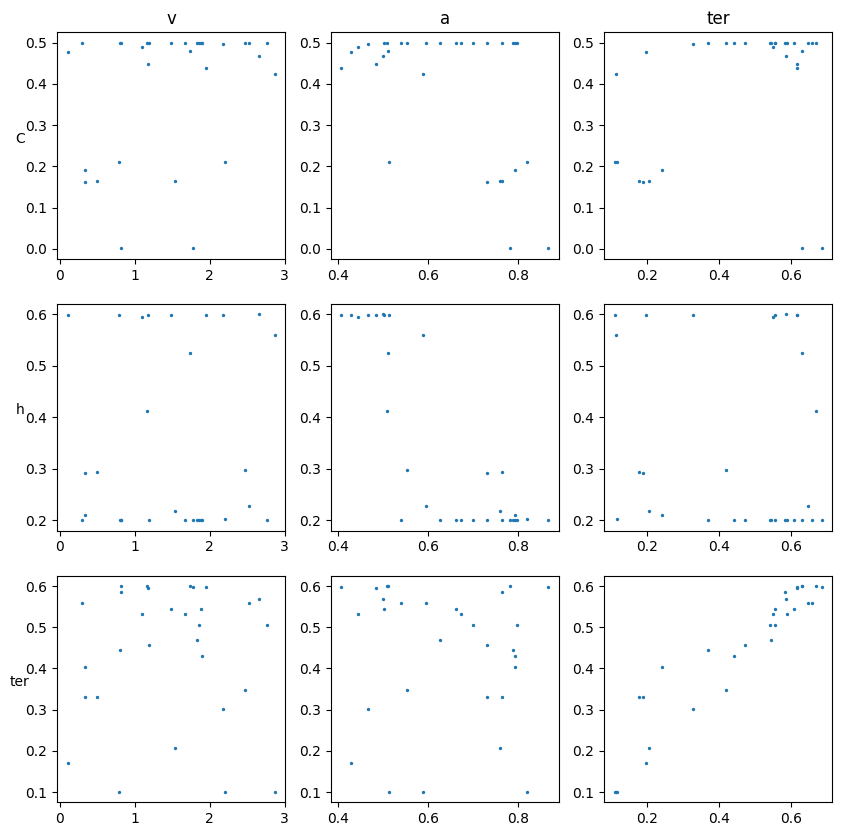

In [85]:
sim_num = 30
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(10,10))

ax1.scatter(Vs[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax2.scatter(As[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax3.scatter(Ters[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax4.scatter(Vs[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax5.scatter(As[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax6.scatter(Ters[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax7.scatter(Vs[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax8.scatter(As[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax9.scatter(Ters[0:sim_num], par_fitted[0:sim_num,2], s = 2)

ax1.set_title("v")
ax2.set_title("a")
ax3.set_title("ter")

ax1.set_ylabel("C", rotation=0)
ax4.set_ylabel("h", rotation=0)
ax7.set_ylabel("ter", rotation=0)

In [151]:
Vs = np.random.uniform(low=0, high=3, size=30)
As = np.random.uniform(low=0.5, high=0.9, size=30)
Ters = np.random.uniform(low=0.1, high=0.7, size=30)
cs = np.random.uniform(low=0.1, high=1, size=30)

n_trials = 150
num_samples = 100
par_fitted = np.zeros((30,4))

for i in range(len(Vs)):
    print(i)
    v,a,ter = Vs[i], As[i], Ters[i]
    DDM_o = simul_DDM(np.tile((Vs[i], As[i], Ters[i]), (n_trials,1)), c = cs[i]) # simulate IDM data
    
    mnle_posterior = trainer.build_posterior(
    mcmc_method="slice_np_vectorized", mcmc_parameters=mcmc_parameters, prior = prior
    )
    
    mnle_posterior.set_default_x(DDM_o)
    mnle_map = mnle_posterior.map()
    
    par_fitted[i,:] = np.array(mnle_map)
    
    

0


/Users/wangjiashun/Documents/GitHub/sbi/sbi/utils/sbiutils.py:321: UserWarning: An x with a batch size of 150 was passed. It will be interpreted as a batch of independent and identically
            distributed data X={x_1, ..., x_n}, i.e., data generated based on the
            same underlying (unknown) parameter. The resulting posterior will be with
            respect to entire batch, i.e,. p(theta | X).
  respect to entire batch, i.e,. p(theta | X)."""


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


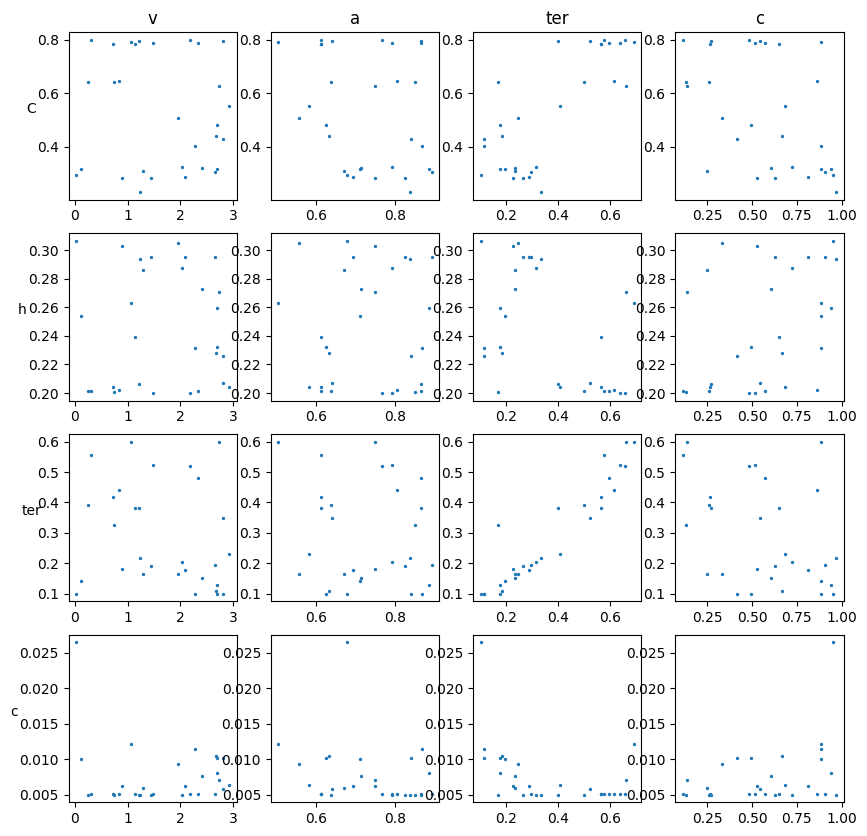

In [155]:
sim_fit_plot_4(Vs, As, Ters, cs, par_fitted, sim_num = 30)

In [ ]:
Vs = np.random.uniform(low=0, high=4, size=30)
As = np.random.uniform(low=0.6, high=2, size=30)
Ters = np.random.uniform(low=0.2, high=0.8, size=30)

n_trials = 300
num_samples = 100
par_fitted = np.zeros((30,3))


In [ ]:
for i in range(len(Vs)):
    print(i)
    v,a,ter = Vs[i], As[i], Ters[i]
    DDM_o = simul_DDM(np.tile((Vs[i], As[i], Ters[i]), (n_trials,1)), c = 1) # simulate IDM data
    print(DDM_o[0:5,:])
    #prior = utils.BoxUniform(low=[0,0.2,0.1], high=[0.6,0.6,0.6])
    mnle_posterior = trainer.build_posterior(
    mcmc_method="slice_np_vectorized", mcmc_parameters=mcmc_parameters, prior = prior
    )
    
    #mnle_samples = mnle_posterior.sample((num_samples,), x=x_o) # fit with IDM
    mnle_posterior.set_default_x(DDM_o)
    mnle_map = mnle_posterior.map()
    
    par_fitted[i,:] = np.array(mnle_map)
    
    

In [ ]:
## replicate again changing the priors for h and Ter 
sim_fit_plot(Vs, As, Ters, par_fitted, sim_num = 19)

Text(0, 0.5, 'ter')

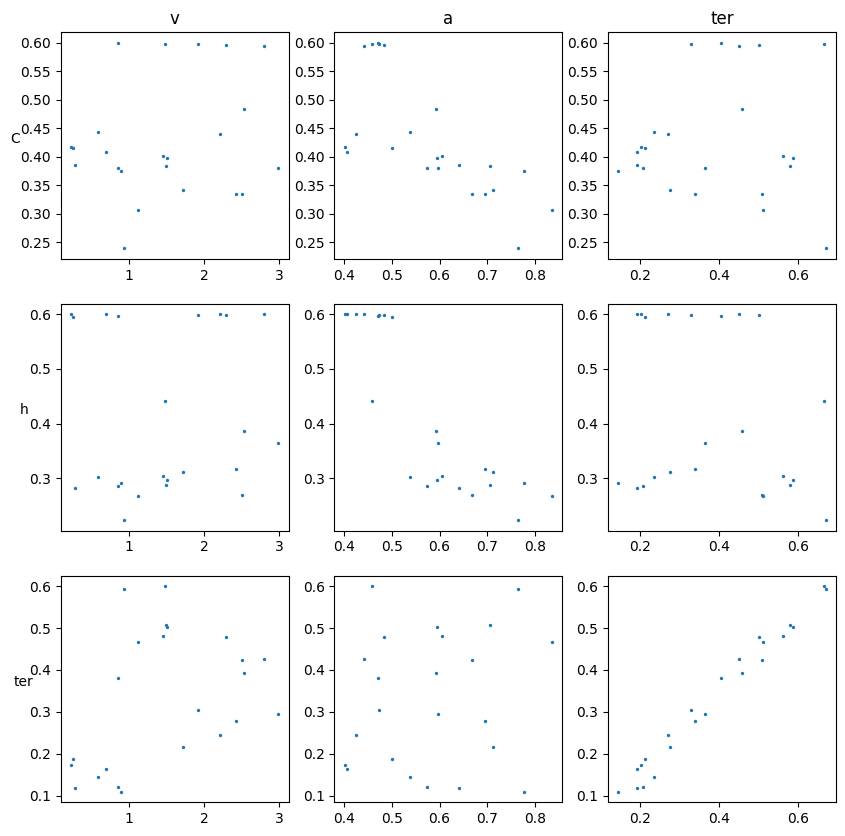

In [107]:
## original
sim_num = 23
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(10,10))

ax1.scatter(Vs[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax2.scatter(As[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax3.scatter(Ters[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax4.scatter(Vs[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax5.scatter(As[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax6.scatter(Ters[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax7.scatter(Vs[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax8.scatter(As[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax9.scatter(Ters[0:sim_num], par_fitted[0:sim_num,2], s = 2)

ax1.set_title("v")
ax2.set_title("a")
ax3.set_title("ter")

ax1.set_ylabel("C", rotation=0)
ax4.set_ylabel("h", rotation=0)
ax7.set_ylabel("ter", rotation=0)

## Simulate from DDM and fit from IDM from pyDDM

In [25]:
Vs = np.random.uniform(low=0, high=3, size=30)
As = np.random.uniform(low=0.4, high=0.9, size=30)
Ters = np.random.uniform(low=0.1, high=0.7, size=30)

n_trials = 10
num_samples = 100
par_fitted = np.zeros((30,3))

In [ ]:
for i in range(len(Vs)):
    print(i)
    v,a,ter = Vs[i], As[i], Ters[i]
    DDM_o = simul_DDM_mult_trial(v, a, ter, n_trials) # simulate DDM data
    
    #mnle_samples = mnle_posterior.sample((num_samples,), x=x_o) # fit with IDM
    mnle_posterior.set_default_x(DDM_o)
    mnle_map = mnle_posterior.map()
    
    par_fitted[i,:] = np.array(mnle_map)

In [ ]:
sim_num = 15
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(10,10))

ax1.scatter(Vs[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax2.scatter(As[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax3.scatter(Ters[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax4.scatter(Vs[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax5.scatter(As[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax6.scatter(Ters[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax7.scatter(Vs[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax8.scatter(As[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax9.scatter(Ters[0:sim_num], par_fitted[0:sim_num,2], s = 2)

ax1.set_title("v")
ax2.set_title("a")
ax3.set_title("ter")

ax1.set_ylabel("C", rotation=0)
ax4.set_ylabel("h", rotation=0)
ax7.set_ylabel("ter", rotation=0)

In [34]:
par_fitted_IDM[0:sim_num,0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Simulate from IDM and fit from IDM

In [37]:
Cs = np.random.uniform(low=0, high=0.4, size=30)
hs = np.random.uniform(low=0.2, high=0.6, size=30)
ters = np.random.uniform(low=0.1, high=0.6, size=30)
n_trials = 1000
num_samples = 100
par_fitted_IDM = np.zeros((30,3))


In [ ]:
#plt.scatter(0,0)
#plt.xlim(0,0.5)
#plt.ylim(0,0.5)
#plt.show()

for i in range(len(Vs)):
    print(i)
    IDM_o = simul_IDM_mult_trial(np.tile((Cs[i], hs[i], ters[i]), (n_trials,1))) # simulate IDM data
    
    prior = utils.BoxUniform(low=[0,0.2,0.1], high=[0.4,0.6,0.6])
    mnle_posterior = trainer.build_posterior(
    mcmc_method="slice_np_vectorized", mcmc_parameters=mcmc_parameters, prior = prior
    )
    #mnle_samples = mnle_posterior.sample((num_samples,), x=DDM_o) # fit with IDM
    
    mnle_posterior.set_default_x(IDM_o)
    mnle_map = mnle_posterior.map()
    
    par_fitted_IDM[i,:] = np.array(mnle_map)
    #plt.scatter(Cs[i],mnle_map[0])
    #plt.show()

Text(0, 0.5, 'ter')

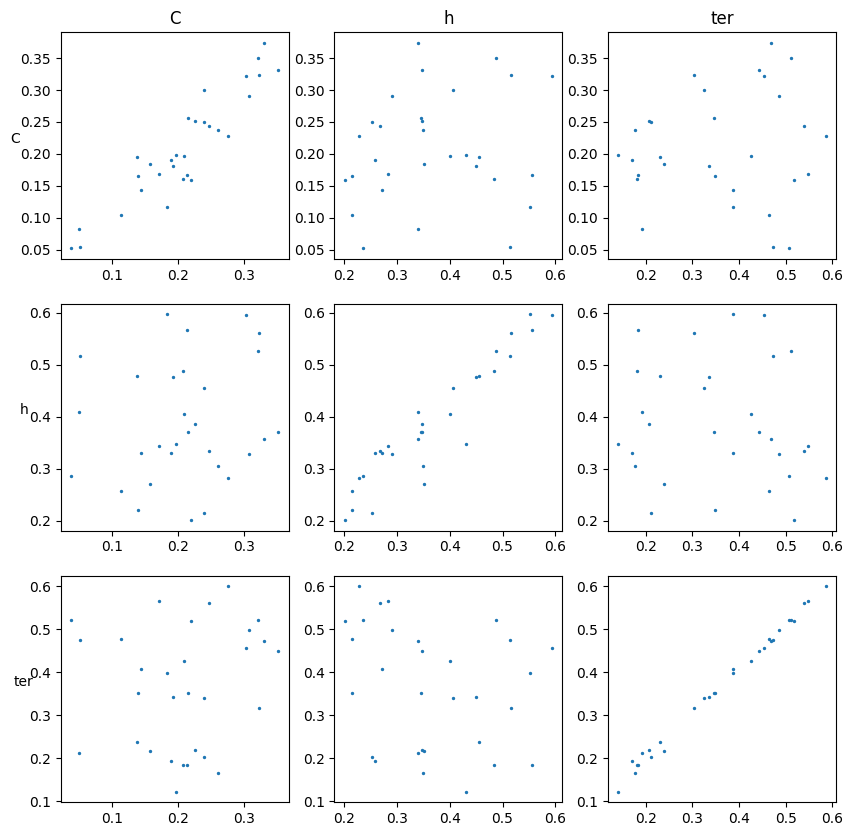

In [47]:

sim_num = 30
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(10,10))

ax1.scatter(Cs[0:sim_num], par_fitted_IDM[0:sim_num,0], s = 2)
ax2.scatter(hs[0:sim_num], par_fitted_IDM[0:sim_num,0], s = 2)
ax3.scatter(ters[0:sim_num], par_fitted_IDM[0:sim_num,0], s = 2)
ax4.scatter(Cs[0:sim_num], par_fitted_IDM[0:sim_num,1], s = 2)
ax5.scatter(hs[0:sim_num], par_fitted_IDM[0:sim_num,1], s = 2)
ax6.scatter(ters[0:sim_num], par_fitted_IDM[0:sim_num,1], s = 2)
ax7.scatter(Cs[0:sim_num], par_fitted_IDM[0:sim_num,2], s = 2)
ax8.scatter(hs[0:sim_num], par_fitted_IDM[0:sim_num,2], s = 2)
ax9.scatter(ters[0:sim_num], par_fitted_IDM[0:sim_num,2], s = 2)

ax1.set_title("C")
ax2.set_title("h")
ax3.set_title("ter")

ax1.set_ylabel("C", rotation=0)
ax4.set_ylabel("h", rotation=0)
ax7.set_ylabel("ter", rotation=0)

In [ ]:
i = 0
np.repeat(np.array((Vs[i], As[i], Ters[i])), num_trials, 1)

In [ ]:
#### try to build diffusion model by myself!!!!!
#### try to do parameter recovery for diffusion models!!!!!